In [15]:
from impresso import connect

client = connect()

🎉 You are now connected to the Impresso API!  🎉
🔗 Using API: https://dev.impresso-project.ch/public-api/v1


# Search

Find content items in Impresso using a variety of different filters.

## Term

Find all items containing "impresso" keyword.

In [16]:
client.search.find(term="monthy python")

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
luxland-1991-12-06-a-i0055,ar,Unzufriedenes Gefühl,,[{'uid': '2-54-Reuters'}],"[{'uid': '2-50-Parry'}, {'uid': '2-50-Robin_Wi...","[{'uid': 'tm-de-all-v2.0_tp87_de', 'relevance'...",414,1,de,False,1991-12-06T00:00:00+00:00,LU,BNL,luxland,newspaper
LCE-1982-09-14-a-i0018,ar,A L'AFFICHE,,[],"[{'uid': '2-50-Arnold'}, {'uid': '2-50-Pierre'}]","[{'uid': 'tm-fr-all-v2.0_tp73_fr', 'relevance'...",147,1,fr,False,1982-09-14T00:00:00+00:00,CH,SNL,LCE,newspaper
luxland-2007-06-22-a-i0043,ar,Prévisible homme vert,,[],"[{'uid': '2-50-Harold_Godwinson'}, {'uid': '2-...","[{'uid': 'tm-fr-all-v2.0_tp73_fr', 'relevance'...",212,1,fr,False,2007-06-22T00:00:00+00:00,LU,BNL,luxland,newspaper


### Pagination

In [17]:
result = client.search.find(
    term="monthy python",
    limit=2,
)

print(f"Total items in the result set: {result.total}")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first title is {page.raw['data'][0]['title']}"
    )


Total items in the result set: 8
Got page 0 - 2 of 8. The first title is Unzufriedenes Gefühl
Got page 2 - 4 of 8. The first title is Prévisible homme vert
Got page 4 - 6 of 8. The first title is Aux élus et aux membres des comités locaux PRD du district de St-Mauri[...]
Got page 6 - 8 of 8. The first title is DU TAC


## With text content only

Limit to content items that have text.

In [18]:
client.search.find(term="impresso", with_text_contents=True)

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
luxland-2000-06-23-a-i0028,ar,Vor 400 Jahren wurde in Luxemburg das erste Bu...,,"[{'uid': '2-54-Resurrection_of_Jesus'}, {'uid'...","[{'uid': '2-50-Jesus_(Begriffsklärung)'}, {'ui...","[{'uid': 'tm-de-all-v2.0_tp11_de', 'relevance'...",2999,3,de,False,2000-06-23T00:00:00+00:00,LU,BNL,luxland,newspaper
NV2-1874-03-10-a-i0002,page,NOUVELLISTE VAUDOIS I Le transport,,"[{'uid': '2-54-Afrique'}, {'uid': '2-54-Vienne...","[{'uid': '2-50-Delsol'}, {'uid': '2-50-Léon_Ga...","[{'uid': 'tm-fr-all-v2.0_tp36_fr', 'relevance'...",2913,1,fr,False,1874-03-10T00:00:00+00:00,CH,BCUL,NV2,newspaper


## Title
Find items that have the keyword "impresso" in their title.

In [19]:
client.search.find(title="impresso")

""


### Complex term requests
Find items that have both terms.

In [20]:
from impresso import AND

client.search.find(title=AND("homme", "femme"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
GAV-1890-12-27-a-i0006,ar,"Art, 1. Chaque personne, homme ou femme,...",,[{'uid': '2-54-Société'}],[],"[{'uid': 'tm-fr-all-v2.0_tp70_fr', 'relevance'...",202,1,fr,False,1890-12-27T00:00:00+00:00,CH,SNL,GAV,newspaper
LLS-1980-06-25-a-i0003,ar,ÉGALITÊ HOMME-FEMME: lOMMAGE!,,[],[],"[{'uid': 'tm-fr-all-v2.0_tp88_fr', 'relevance'...",818,1,fr,False,1980-06-25T00:00:00+00:00,CH,SNL,LLS,newspaper
LLS-1982-12-08-a-i0006,ar,ËGALITÉ HOMME—FEMME; GAGHOTTERIES,,[],[{'uid': '2-50-Christiane_Brunner'}],"[{'uid': 'tm-fr-all-v2.0_tp87_fr', 'relevance'...",370,1,fr,False,1982-12-08T00:00:00+00:00,CH,SNL,LLS,newspaper


Find items that have either one term or the other.

Here we find all content items that contain either "homme" or "femme" in the title.

In [21]:
from impresso import OR

client.search.find(title=OR("homme", "femme"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
CDV-1850-11-16-a-i0020,ar,LE RÊVE D'UN HOMME D'ETAT,,[],[],[],21,1,fr,False,1850-11-16T00:00:00+00:00,CH,SNL,CDV,newspaper
CON-1902-10-29-a-i0003,ar,Humoristique Entre amis : Ma femme est m...,,[],[],"[{'uid': 'tm-fr-all-v2.0_tp18_fr', 'relevance'...",65,1,fr,False,1902-10-29T00:00:00+00:00,CH,SNL,CON,newspaper
FedGazFr-1982-07-27-a-i0001,ar,Rapport sur la politique de la Suisse en faveu...,,"[{'uid': '2-54-Suisse'}, {'uid': '2-54-Genève'...","[{'uid': '2-50-Arthur_Honegger'}, {'uid': '2-5...",[],19944,65,fr,True,1982-07-27T00:00:00+00:00,CH,SFA,FedGazFr,newspaper


## Inverted search (everything excluding term A __OR__ term B).

We want to find all content items with the word "luddite" in the title that do not mention neither "textile" nor "machine"

In [22]:
from impresso import OR

client.search.find(title="luddite", term=~OR("textile", "machine"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
armeteufel-1921-06-04-a-i0015,ar,Ernst Toller: Die Ludditen. Das Vorspiel.,,"[{'uid': '2-54-England'}, {'uid': '2-54-Portug...","[{'uid': '2-50-Palace_of_Westminster'}, {'uid'...","[{'uid': 'tm-de-all-v2.0_tp41_de', 'relevance'...",990,1,de,False,1921-06-04T00:00:00+00:00,LU,BNL,armeteufel,newspaper


### Complex combintation of terms

The following cell searches all content items with all of the the following condition:

* mentioning "hitler" and "stalin"
* also mentioning one of: "molotow" or "ribbentrop"
* and not mentioning "churchill"

In [23]:
from impresso import AND, OR

client.search.find(term=AND("hitler", "stalin") & OR("molotow", "ribbentrop") & ~OR("churchill"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
luxwort-1946-04-30-a-i0004,ar,Wie Hitlers Dolmetscher sie sah Hinter den ver...,,[],"[{'uid': '2-50-Adolf_Hitler'}, {'uid': '2-50-J...","[{'uid': 'tm-de-all-v2.0_tp61_de', 'relevance'...",1050,1,de,False,1946-04-30T00:00:00+00:00,LU,BNL,luxwort,newspaper
luxwort-1940-03-30-a-i0005,ar,Hitler-Vrief an Stalin.,,[],"[{'uid': '2-50-Rudolf_Heß'}, {'uid': '2-50-Ben...","[{'uid': 'tm-de-all-v2.0_tp61_de', 'relevance'...",427,1,de,False,1940-03-30T00:00:00+00:00,LU,BNL,luxwort,newspaper
dunioun-1946-03-30-a-i0102,ar,DE NÜRNBERGER PROZESS,,[{'uid': '2-54-Däitscht_Räich_vun_1933_bis_194...,[{'uid': '2-50-Adolf_Hitler'}],"[{'uid': 'tm-lb-all-v2.1_tp53_lb', 'relevance'...",593,1,lb,True,1946-03-30T00:00:00+00:00,LU,BNL,dunioun,newspaper


## Front page

Find content items published on the front page only

In [24]:
client.search.find(term="impresso", front_page=True)

""


## Entity ID

Search by entity ID

In [25]:
client.search.find(entity_id="aida-0001-54-Switzerland")

""


Find all content items that mention Switzerland and Albert Einstein.

In [26]:
client.search.find(entity_id=AND("aida-0001-54-Switzerland", "aida-0001-50-Albert_Einstein"))

""


Find all content items that mention either Switzerland or Albert Einstein.

In [27]:
client.search.find(entity_id=OR("aida-0001-54-Switzerland", "aida-0001-50-Albert_Einstein"))

""


## Newspaper

Limit search to two newspapers

In [28]:
client.search.find(term="independence", newspaper_id=OR("EXP", "GDL"))

""


## Date range

Items published between dates

In [29]:
from impresso import DateRange

client.search.find(term="independence", date_range=DateRange("1921-05-21", "2001-01-02"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
luxwort-1945-07-04-a-i0001,ar,"„Proclaim liberty throughout the land..."" Ganz...",,[],"[{'uid': '2-50-Adler'}, {'uid': '2-50-Charlott...","[{'uid': 'tm-de-all-v2.0_tp79_de', 'relevance'...",1079,1,de,True,1945-07-04T00:00:00+00:00,LU,BNL,luxwort,newspaper
luxwort-1947-07-06-a-i0034,ar,Molotow erscheint nicht zur Feier des Independ...,,[],[{'uid': '2-50-Wjatscheslaw_Michailowitsch_Mol...,"[{'uid': 'tm-de-all-v2.0_tp77_de', 'relevance'...",63,1,de,True,1947-07-06T00:00:00+00:00,LU,BNL,luxwort,newspaper
luxwort-1950-12-27-a-i0043,ar,Präsident Truman wieder in Washington,,"[{'uid': '2-54-Independence'}, {'uid': '2-54-M...","[{'uid': '2-50-Harry_S._Truman'}, {'uid': '2-5...","[{'uid': 'tm-de-all-v2.0_tp77_de', 'relevance'...",83,1,de,True,1950-12-27T00:00:00+00:00,LU,BNL,luxwort,newspaper


Content items published at any time excluding the range (not the `~` that negates the range).

In [30]:
from impresso import DateRange

client.search.find(term="independence", date_range=~DateRange("1921-05-21", "2001-01-02"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
luxwort-1904-04-09-a-i0015,ar,Lokal-Neuigkeiten.,,[],[{'uid': '2-50-Peter'}],"[{'uid': 'tm-de-all-v2.0_tp94_de', 'relevance'...",367,1,de,False,1904-04-09T00:00:00+00:00,LU,BNL,luxwort,newspaper
waechtersauer-1849-02-07-a-i0007,ar,Belgien.,,[{'uid': '2-54-Belgien'}],[],"[{'uid': 'tm-de-all-v2.0_tp47_de', 'relevance'...",65,1,de,False,1849-02-07T00:00:00+00:00,LU,BNL,waechtersauer,newspaper
NTS-1873-09-20-a-i0020,ar,— New-Iork. In Schevreport (Louisiana) b...,,[],[],"[{'uid': 'tm-de-all-v2.0_tp47_de', 'relevance'...",158,1,de,False,1873-09-20T00:00:00+00:00,CH,SNL,NTS,newspaper


## Language

Search for the term "banana" in English or Italian.

In [31]:
client.search.find(term="banana", language=OR("it", "en"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
luxland-2004-06-18-a-i0025,ar,New Europe,,"[{'uid': '2-54-Luxembourg'}, {'uid': '2-54-Hun...",[],[],239,1,en,False,2004-06-18T00:00:00+00:00,LU,BNL,luxland,newspaper
luxland-2007-06-15-a-i0041,ar,Letter to the Editor,,[{'uid': '2-54-England'}],[],[],445,1,en,False,2007-06-15T00:00:00+00:00,LU,BNL,luxland,newspaper
luxland-2005-09-09-a-i0019,ar,Conflicting views about Europe's future,,"[{'uid': '2-54-Europe'}, {'uid': '2-54-Luxembo...",[{'uid': '2-50-Jacques_Chirac'}],[],1079,1,en,False,2005-09-09T00:00:00+00:00,LU,BNL,luxland,newspaper


And now search for the word "banana" in any language _except_ English or Italian.

In [32]:
client.search.find(term="banana", language=~OR("it", "en"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
lepetitparisien-1909-02-26-a-i0063,ar,« LA BANANA »,,[],[],"[{'uid': 'tm-fr-all-v2.0_tp43_fr', 'relevance'...",190,1,fr,False,1909-02-26T00:00:00+00:00,FR,BNF,lepetitparisien,newspaper
LSE-1927-02-07-a-i0006,ar,ECHOS,,[],[],"[{'uid': 'tm-fr-all-v2.0_tp36_fr', 'relevance'...",201,1,fr,True,1927-02-07T00:00:00+00:00,CH,SNL,LSE,newspaper
LCE-1975-04-25-a-i0020,ar,BANANAS,,[],[{'uid': '2-50-Woody_Allen'}],"[{'uid': 'tm-fr-all-v2.0_tp73_fr', 'relevance'...",229,1,fr,False,1975-04-25T00:00:00+00:00,CH,SNL,LCE,newspaper


## Entity mention

Find content items that mention two entities.

In [33]:
client.search.find(mention=AND("Charlie Chaplin", "Switzerland"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
NZZ-1947-02-28-c-i0008,page,[REDACTED],[REDACTED],"[{'uid': '2-54-Malcolm_Reed'}, {'uid': '2-54-M...","[{'uid': '2-50-Willi'}, {'uid': '2-50-Sarah_Be...","[{'uid': 'tm-de-all-v2.0_tp87_de', 'relevance'...",1045,1,de,False,1947-02-28T00:00:00+00:00,CH,NZZ,NZZ,newspaper


## Topic

Find content items that match either of the two topics.

In [34]:
client.search.find(topic_id=OR("tm-fr-all-v2.0_tp07_fr", "tm-fr-all-v2.0_tp48_fr"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
LSE-1959-08-25-a-i0059,ar,LA FOUDRE INCENDIAIRE,,[],[],"[{'uid': 'tm-fr-all-v2.0_tp48_fr', 'relevance'...",272,1,fr,False,1959-08-25T00:00:00+00:00,CH,SNL,LSE,newspaper
lepetitparisien-1925-02-27-a-i0066,ar,Une ferme détruite par un incendie,,[{'uid': '2-54-Pontoise'}],[],"[{'uid': 'tm-fr-all-v2.0_tp48_fr', 'relevance'...",102,1,fr,False,1925-02-27T00:00:00+00:00,FR,BNF,lepetitparisien,newspaper
lepetitparisien-1908-09-04-a-i0048,ar,"Un chantier de bois et une scierie détruits, à...",,"[{'uid': '2-54-Provins'}, {'uid': '2-54-Arrond...",[],"[{'uid': 'tm-fr-all-v2.0_tp48_fr', 'relevance'...",162,1,fr,False,1908-09-04T00:00:00+00:00,FR,BNF,lepetitparisien,newspaper


## Collection

Find all content items in a collection.

In [35]:
client.search.find(collection_id="REPLACEME")

""


## Country

Find all content items published in either of the two specified countries.

In [36]:
client.search.find(term="Schengen", country=OR("FR", "CH"))

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
arbeitgeber-2005-05-04-a-i0044,page,[REDACTED],[REDACTED],"[{'uid': '2-54-Convention_de_Schengen'}, {'uid...",[],"[{'uid': 'tm-fr-all-v2.0_tp87_fr', 'relevance'...",611,1,fr,False,2005-05-04T00:00:00+00:00,CH,SWA,arbeitgeber,newspaper
arbeitgeber-2005-05-04-a-i0046,page,[REDACTED],[REDACTED],"[{'uid': '2-54-Europe_de_l'Ouest'}, {'uid': '2...",[],"[{'uid': 'tm-fr-all-v2.0_tp87_fr', 'relevance'...",735,1,fr,False,2005-05-04T00:00:00+00:00,CH,SWA,arbeitgeber,newspaper
LCE-2002-02-15-a-i0047,ar,des conditions claires Négocier dans,,"[{'uid': '2-54-Suisse'}, {'uid': '2-54-Union_e...",[],"[{'uid': 'tm-fr-all-v2.0_tp87_fr', 'relevance'...",328,1,fr,False,2002-02-15T00:00:00+00:00,CH,SNL,LCE,newspaper


## Partner

Limit search to content items provided by a specific partner of the Impresso project.

In [37]:
client.search.find(term="Schengen", partner_id="Migros")

""


## Text reuse cluster

Find all content items that are part of a specific text reuse cluster.

In [38]:
from impresso import OR
client.search.find(text_reuse_cluster_id=OR("tr-nobp-all-v01-c29"))

""


# Facets

Facets are a way to get a summary of the search results from the perspective of a specific field. In a facet search result the field values are grouped together and the number of items in each group is displayed. 

Facet search method has the same attributes as the search method.

## Date range

Get the number of content items that mention "Impresso", published on ever particular date.

,count
value,
1975-12-01T00:00:00Z,3
1976-12-01T00:00:00Z,1
1979-12-01T00:00:00Z,1

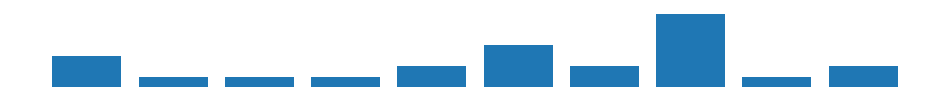

In [39]:
client.search.facet("daterange", term="monty python")

### Pagination

In [40]:
result = client.search.facet(
    "daterange",
    term="monty python",
    limit=5,
)

print(f"Total items in the result set: {result.total}")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first title is {page.raw['data'][0]['value']}"
    )

Total items in the result set: 21
Got page 0 - 5 of 21. The first title is 1975-12-01T00:00:00Z
Got page 5 - 10 of 21. The first title is 1983-12-01T00:00:00Z
Got page 10 - 15 of 21. The first title is 1988-12-01T00:00:00Z
Got page 15 - 20 of 21. The first title is 1999-12-01T00:00:00Z
Got page 20 - 21 of 21. The first title is 2005-12-01T00:00:00Z


## Year

Get the number of content items that mention "impresso", published during every particular year.

,count
value,
1874,1
2000,1

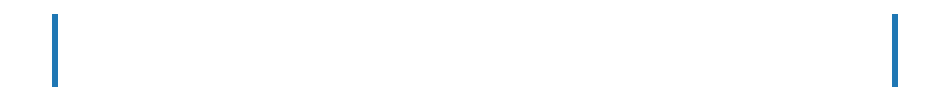

In [41]:
client.search.facet("year", term="impresso")

## Content length

Get the number of content items that mention "impresso", grouped by content length.

,count
value,
0,0
100,0
200,0

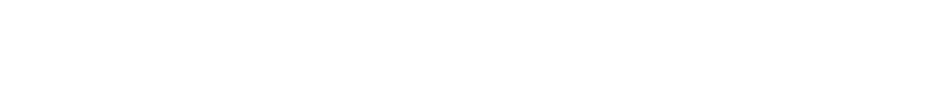

In [42]:
client.search.facet("contentLength", term="impresso")

## Month

Get the number of content items that mention "impresso", published during every particular month.

,count
value,
3,1
6,1

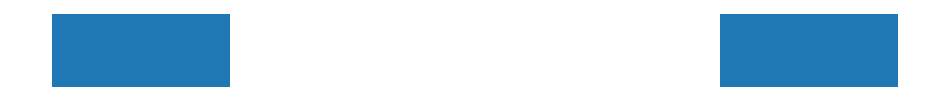

In [43]:
client.search.facet("month", term="impresso")

## Country

Get the number of content items that mention "impresso", grouped by country they were published in.

,count
value,
CH,1
LU,1

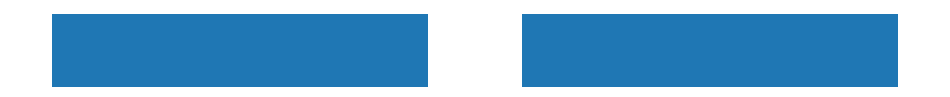

In [44]:
client.search.facet("country", term="impresso")

## Type

Get the number of items that mention "impresso", grouped by type of item.

,count
value,
ad,2108971
ar,7977884
chapter,1

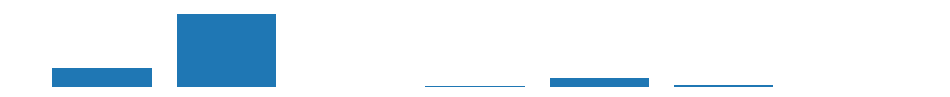

In [45]:
client.search.facet("type")

## Topic

Find topics that the content items mentioning "impresso" are related to.

,count,label
value,,
tm-de-all-v2.0_tp00_de,48,"london (0.02403), new (0.01812), york (0.01433..."
tm-de-all-v2.0_tp01_de,37,"new (0.03594), york (0.02121), spanien (0.0209..."
tm-de-all-v2.0_tp02_de,394,"zimmer (0.02682), wort (0.02321), expedition (..."

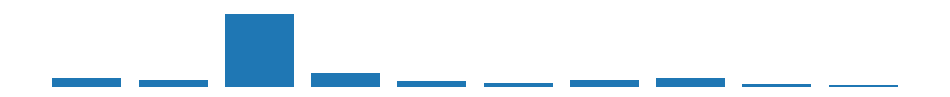

In [46]:
client.search.facet("topic", term="pomme")

## Collection

Find collections the content items mentioning "pomme" are part of.

In [47]:
client.search.facet("collection", term="pomme")

""


## Newspaper

Find newspapers that the content items mentioning "Schengen" were published in.

,count,label
value,,
FedGazDe,17,Bundesblatt
FedGazFr,18,Feuille Fédérale
GAV,1,Gazette du Valais / Nouvelle gazette du Valais

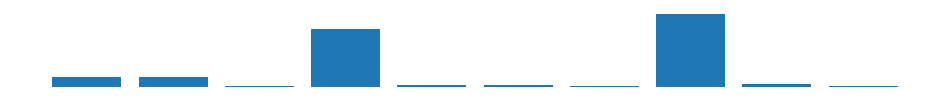

In [48]:
client.search.facet("newspaper", term="Schengen")

## Language

Find all languages the content items mentioning "impresso" were published in.

,count
value,
de,6087
fr,1417
lb,236

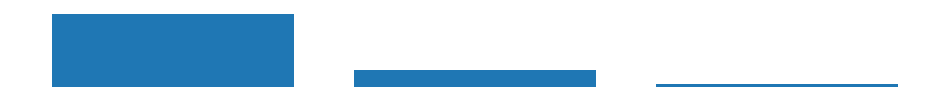

In [49]:
client.search.facet("language", term="Schengen")

## Person

Find all persons mentioned in content items that mention "Schengen". Get only the last page.

,count,label
value,,
2-50-Weinreben,1,Weinreben
2-50-Weis,7,Weis
2-50-Weisgerber,1,Weisgerber

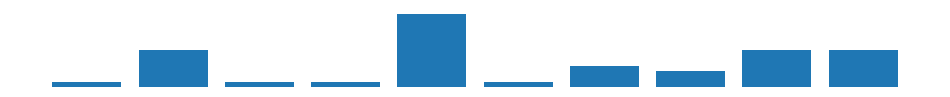

In [50]:
client.search.facet("person", term="Schengen", offset=7140)

## Location

Find all locations mentioned in content items that mention "Schengen". Get only the last page.

,count,label
value,,
2-54-Linthebene,1,Linthebene
2-54-Linz,3,Linz
2-54-Lipa,1,Lipa

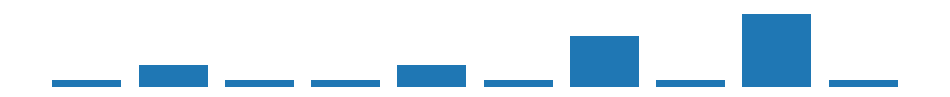

In [51]:
client.search.facet("location", term="Schengen", offset=3310)

## NAG

Find all entities without a known type mentioned in content items that mention "homme" and "femme".

,count
value,
4-55-Havas,1

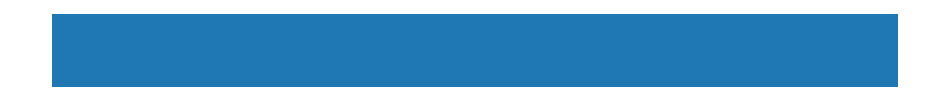

In [52]:
from impresso import AND
client.search.facet("nag", title=AND("homme", "femme"))

## Access rights

Get access rights of content items mentioning "pomme".

In [53]:
client.search.facet("accessRight", term="pomme")

""


## Partner

Get Impresso partners that provided content items mentioning "pomme".

,count
value,
BCUL,1475
BNF,13716
BNL,2385

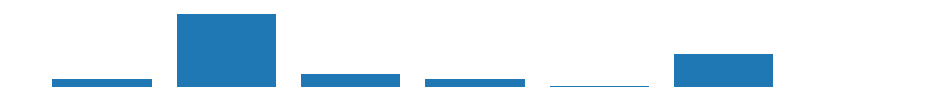

In [54]:
client.search.facet("partner", term="pomme")